In [50]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sea
import numpy as np
from scipy import stats

In [13]:
data = pd.read_csv( "Titanic-Dataset.csv")
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# Univariate Analysis

### Categorical or Qualitative data

In [15]:
data['Pclass'].value_counts()    # <- FREQENCY TABLE

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

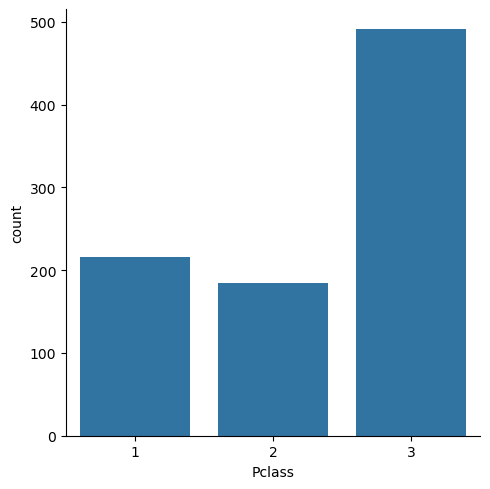

In [16]:
a = data['Pclass'].value_counts()           # bar plot used for displaying categorical variable 
sea.catplot( data=a , kind='bar')           # bar plot is easiest plot for categorical variable

([<matplotlib.patches.Wedge at 0x1d536261d00>,
 [Text(-0.17571616709359641, 1.0858746836637898, 'three'),
  Text(-0.5160762002061153, -0.9714243951954356, 'one'),
  Text(0.8765111456658484, -0.6646263698677192, 'two')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.11'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.24'),
  Text(0.47809698854500815, -0.3625234744733013, '20.65')])

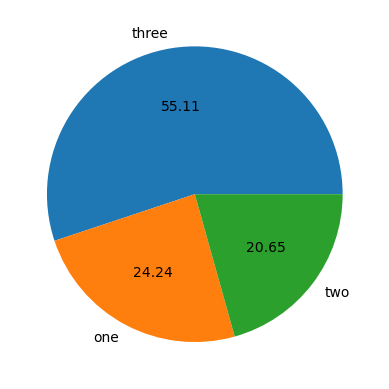

In [17]:
a = data['Pclass'].value_counts()           # pie plot used for displaying categorical variable 
plt.pie(a , labels = ['three','one' ,'two'] , autopct='%0.2f')    

Cumulative 

In [18]:
a = data['Pclass'].value_counts()  
b = ((a/a.sum())*100).values
b

array([55.10662177, 24.24242424, 20.65095398])

In [19]:
c = []
cf=0 
for i in b:
    cf = cf+i
    c.append(cf)
c

[55.106621773288445, 79.34904601571269, 100.0]

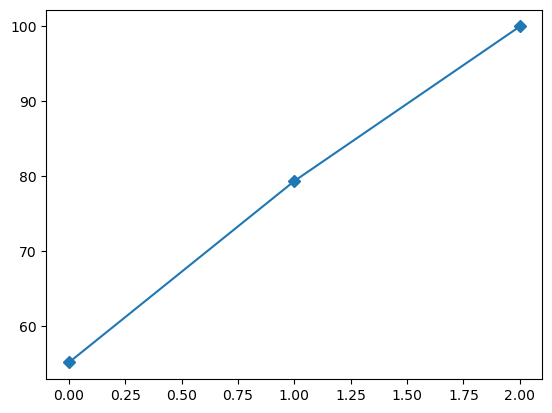

In [20]:
plt.plot(c , marker='D')

### Quantative or Numerical Data

In [21]:
a = data['Age'].values
len(a)                            # making a bar chart wont help

891

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

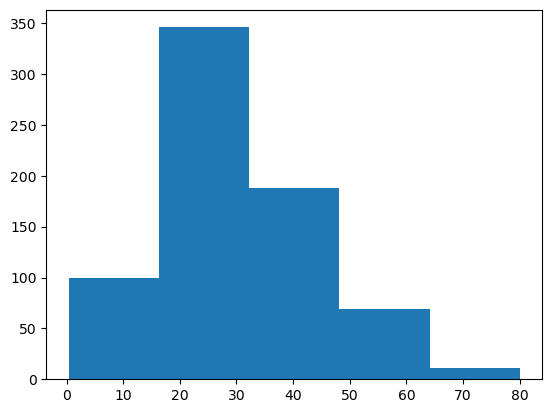

In [22]:
plt.hist(a , bins=5 )

<Axes: xlabel='Age'>

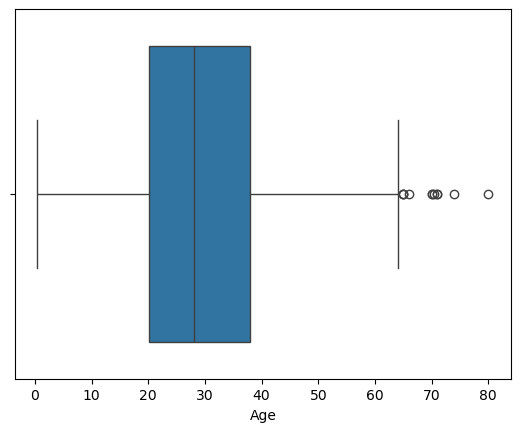

In [23]:
sea.boxplot( data=data , x='Age' )

<Axes: xlabel='Age', ylabel='Density'>

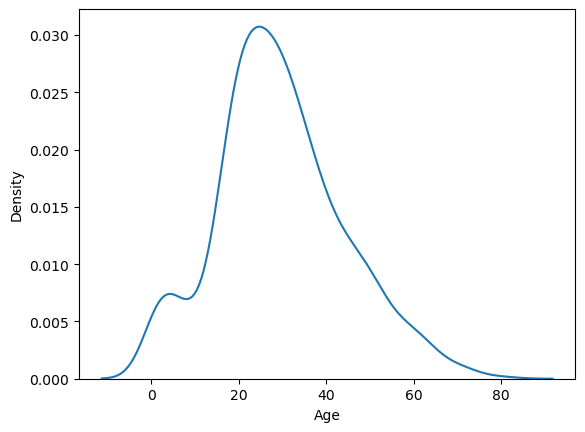

In [24]:
sea.kdeplot( data=data , x='Age')

# Bivariate Analysis

### Categorical vs Numerical

<Axes: xlabel='Pclass', ylabel='Age'>

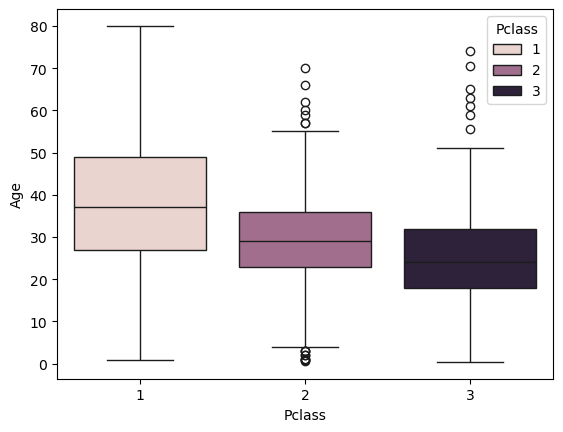

In [25]:
sea.boxplot( data=data , y='Age' , x='Pclass' , hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

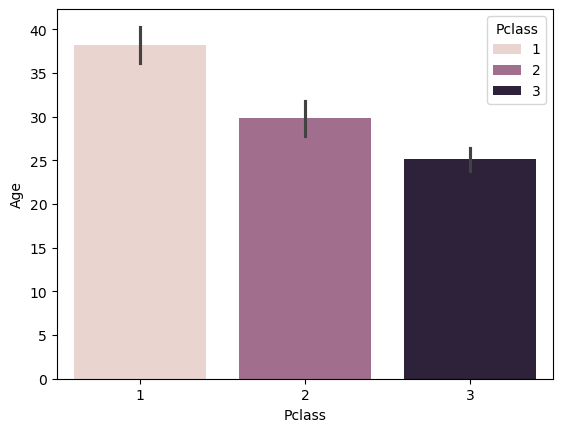

In [26]:
sea.barplot( data=data , y='Age' , x='Pclass' , hue='Pclass')

### Numerical vs Numerical

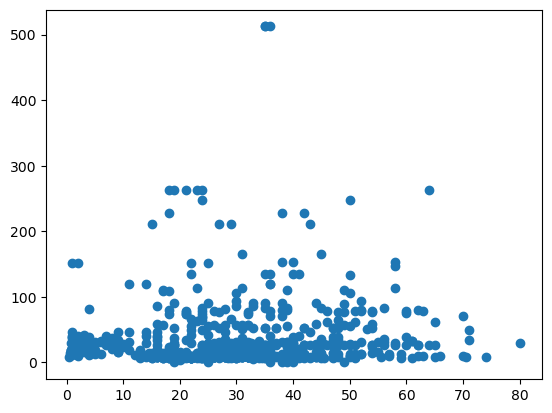

In [27]:
m = data['Age'].values
n = data['Fare'].values
plt.scatter( m,n )

### Numerical vs Numerical -> Contingency table

In [28]:
pd.crosstab( data['Sex'] , data['Pclass'] )

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='Pclass'>

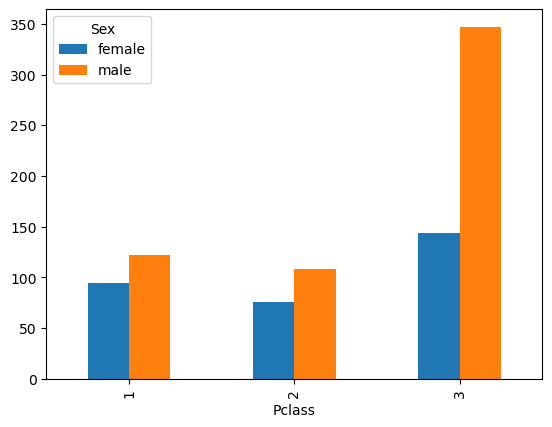

In [29]:
ct = pd.crosstab( data['Pclass'] ,  data['Sex']  )
ct.plot( kind='bar')

<Axes: xlabel='Sex', ylabel='Pclass'>

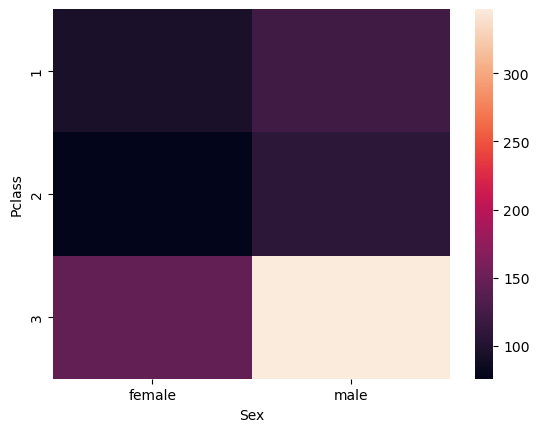

In [30]:
sea.heatmap( ct )

# Measure of Central Tendency

In [31]:
iris = pd.read_csv('Iris.csv')
iris.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [32]:
iris.rename(columns={'SepalLengthCm': 'sl' , 'SepalWidthCm' : 'sw' , 'PetalLengthCm' : 'pl' , 'PetalWidthCm' : 'pw'}, inplace=True)
iris.head(1)

,Id,sl,sw,pl,pw,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [34]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [35]:
setosa = iris[ iris['Species']=='Iris-setosa']
versicolor = iris[ iris['Species']=='Iris-versicolor']
virginica = iris[ iris['Species']=='Iris-virginica']

### MEAN

In [38]:
print( np.mean(setosa['sl']))
print( np.mean(versicolor['sl']))
print( np.mean(virginica['sl']))

5.006
5.936
6.587999999999998


In [39]:
print( np.mean(setosa['pl']))
print( np.mean(versicolor['pl']))
print( np.mean(virginica['pl']))

1.464
4.26
5.5520000000000005


### OUTLIER

(array([ 1.,  1.,  2.,  7., 12., 14.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

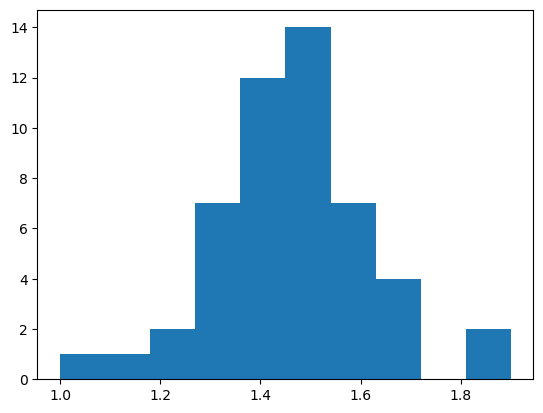

In [40]:
plt.hist( setosa['pl'])

In [45]:
x = np.append(setosa['pl'] , 50)
np.mean(x)   # large change 

2.4156862745098038

### MEDIAN

In [46]:
print( np.median(setosa['pl']))
print( np.median(versicolor['pl']))
print( np.median(virginica['pl']))

1.5
4.35
5.55


### OUTLIER 

In [47]:
x = np.append(setosa['pl'] , 50)
np.median(x)   # no change <- WHEN MORE THAN HALF OF DATA IS NOT OUTLIER TILL THAT POINT MEDIAN IS UNAFFECTED

1.5

### MODE

In [51]:
print( stats.mode(setosa['pl']))
print( stats.mode(versicolor['pl']))
print( stats.mode(virginica['pl']))

ModeResult(mode=1.5, count=14)
ModeResult(mode=4.5, count=7)
ModeResult(mode=5.1, count=7)


# MEASURE OF SPREAD

### RANGE

In [54]:
x = np.max(setosa['pl']) - np.min(setosa['pl'])
x

0.8999999999999999

### PERCENTILE

In [56]:
l = [1,2,3,4,5,6,7,8,9,10]
print(np.percentile(l , 10))
print(np.percentile(l , 50))

1.9
5.5


In [57]:
np.median(l)      # 50 percentile is the median 

5.5

### QUARTILE

In [62]:
print(np.percentile( setosa['pl'] , 25))
print(np.percentile( setosa['pl'] , 50))
print(np.percentile( setosa['pl'] , 75))
print(np.percentile( setosa['pl'] , 100))

1.4
1.5
1.5750000000000002
1.9


### INTER QUARTILE RANGE

In [63]:
IQR = np.percentile( setosa['pl'] , 75) - np.percentile( setosa['pl'] , 25)
IQR

0.17500000000000027

### MEAN ABSOLUTE DEVIATION : 1/N * ( SUM ( abs ( Xi - MEAN )))

### VARIENCE : 1/N * ( SUM ( Xi - MEAN )^2 ) -> not used for measuring spread because the unit of measurement changes

In [64]:
np.var( setosa['pl'] )

0.02950400000000001

### STANDARD DEVIATION : ROOT( VAR )

In [66]:
np.std( setosa['pl'] )

0.17176728442867115

### MEDIAN ABS DEVIATION -> MEDIAN ( NUM - MEAN )

In [71]:
from statsmodels import robust
robust.mad( np.array([1,3,5,7,9]))

2.965204437011204

ST DEV vs MEAN ABS DEV -> MEAN ABS DEV is free from outliers

# PROBABILITY DENSITY FUNCTION

C:\Users\A.N. Tripathi\AppData\Local\Temp\ipykernel_33360\3281731642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot( setosa['pl'] ) # line = pdf


<Axes: xlabel='pl', ylabel='Density'>

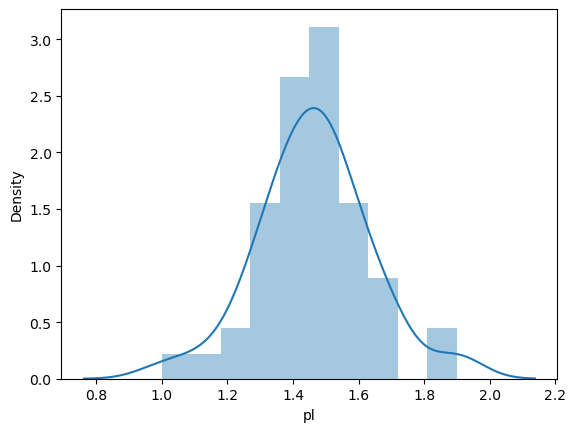

In [81]:
sea.distplot( setosa['pl'] ) # line = pdf

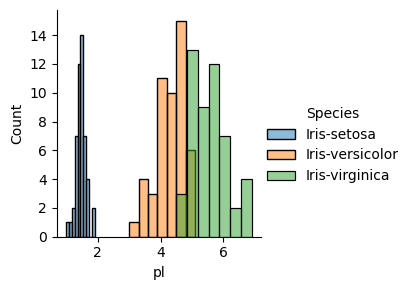

In [89]:
sea.FacetGrid( iris  , hue = 'Species' ).map( sea.histplot , 'pl' , kde=False , alpha=0.5).add_legend()

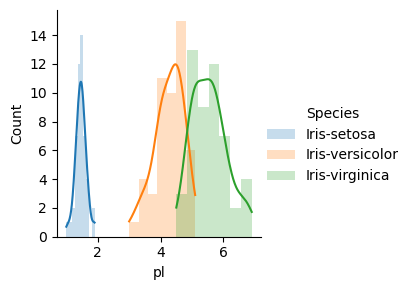

In [94]:
sea.FacetGrid( iris  , hue = 'Species' ).map( sea.histplot , 'pl' , kde=True , alpha=0.25 , edgecolor=None).add_legend()

# CUMULATIVE DISTRIBUTION SYSTEM

In [96]:
np.histogram( setosa['pl'] , bins=10 ) # 1st array -> no of data occurences & 2nd array -> bins edges 

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

In [97]:
count , bins = np.histogram( setosa['pl'] , bins=10 ) 

In [100]:
pdf = count / sum(count)
cdf = np.cumsum( pdf )
print( pdf , cdf , sep='\n')

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


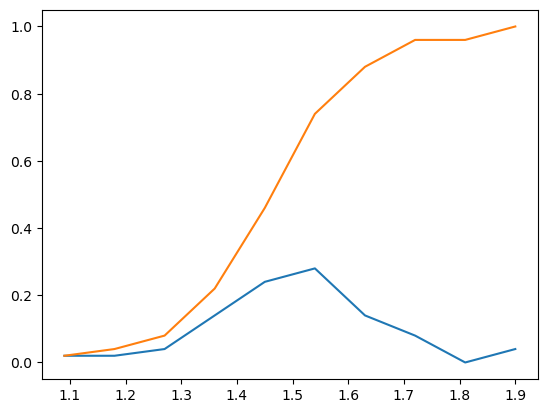

In [102]:
plt.plot( bins[1:] , pdf)
plt.plot( bins[1:] , cdf)

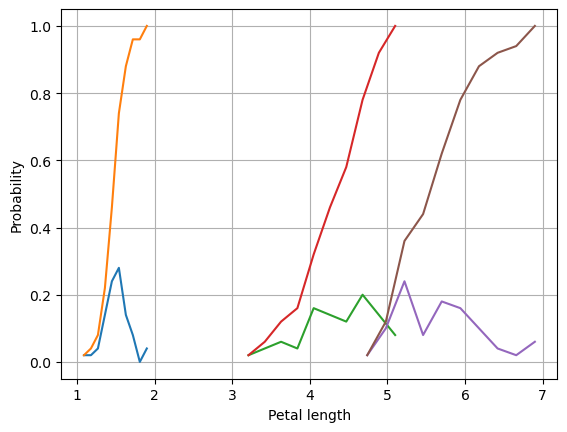

In [107]:
count , bins = np.histogram( setosa['pl'] , bins=10 ) 
pdf = count / sum(count)
cdf = np.cumsum( pdf )
plt.plot( bins[1:] , pdf)
plt.plot( bins[1:] , cdf)

count , bins = np.histogram( versicolor['pl'] , bins=10 ) 
pdf = count / sum(count)
cdf = np.cumsum( pdf )
plt.plot( bins[1:] , pdf)
plt.plot( bins[1:] , cdf)

count , bins = np.histogram( virginica['pl'] , bins=10 ) 
pdf = count / sum(count)
cdf = np.cumsum( pdf )
plt.plot( bins[1:] , pdf)
plt.plot( bins[1:] , cdf)

plt.xlabel('Petal length')
plt.ylabel('Probability')
plt.grid()

# NORMAL DISTRIBUTION

C:\Users\A.N. Tripathi\AppData\Local\Temp\ipykernel_33360\625887263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot( data )


<Axes: ylabel='Density'>

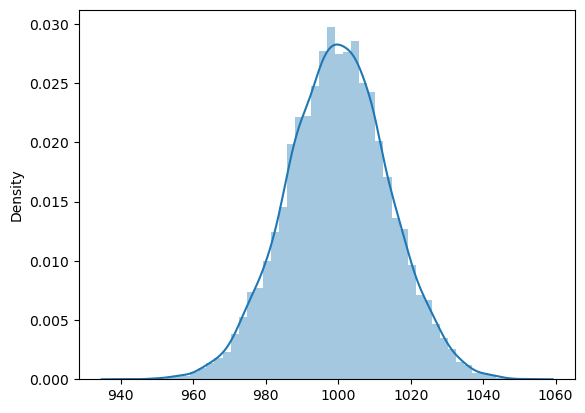

In [109]:
mean = 1000
variance = 200
std_dev = np.sqrt(variance) 
data = np.random.normal(loc=mean, scale=std_dev, size=10000)
sea.distplot( data )

# Z TABLE AND SCORE

In [111]:
# Step 1- Calculate the z score 
z = (700-500)/120 
print(z) 

1.6666666666666667


In [116]:
# Step 2-Lookup the 2 table 
z_value = 0.95

In [117]:
# Step 2-Multiply by 100
final = z_value*100
print( "Rohit performed better than" , final , 'students' )

Rohit performed better than 95.0 students
